# 7 Principle Component Analysis and K-Means Clustering
# 7.1 K-Means Clustering
## Part 1: Find Closest Centroids

In [1]:
# import key libraries (remember to pip install numpy etc. first)
import numpy as np
import sys
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import csv data
PATH="./data/"
DATA="ex7data2.mat"

import scipy.io
mat = scipy.io.loadmat(f'{PATH}{DATA}') # training data stored in arrays X, y
X = mat['X']

In [3]:
def findClosestCentroids(X, centroids):
    #FINDCLOSESTCENTROIDS computes the centroid memberships for every example
    #   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
    #   in idx for a dataset X where each row is a single example. idx = m x 1
    #   vector of centroid assignments (i.e. each entry in range [1..K])
    # Set K
    K = centroids.shape[0]    
    m = X.shape[0]
    idx = np.zeros((m, 1))
    
    # loop over every example
    for i in np.arange(m):
        #iterate over every
        min_norm = 1e10 # track the minimum norm
        min_norm_j = -1. # track the smallest norm - make wrong initially.
        for j in np.arange(K):
            # calculate the norm
            norm = np.sum((X[i,:].T - centroids[j,:].T)**2)
            if norm < min_norm:
                min_norm = norm
                min_norm_j = j
        if min_norm_j == -1:
            print('ERROR:   MIN NORM J IS -1 no index selected') # should never happen
        idx[i]=min_norm_j
    return idx

In [4]:
# Select an initial set of centroids
K = 3 # 3 Centroids
initial_centroids = np.matrix('[3, 3; 6, 2; 8, 5]').A

# Find the closest centroids for the examples using the
# initial_centroids
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples: \n')
print(f'{idx[0:3]}')
print('\n(the closest centroids should be 1, 3, 2 respectively)\n')

print('Program paused. Press enter to continue.\n')

Closest centroids for the first 3 examples: 

[[0.]
 [2.]
 [1.]]

(the closest centroids should be 1, 3, 2 respectively)

Program paused. Press enter to continue.



## Part 2: Compute Means

In [5]:
def computeCentroids(X, idx, K):
#COMPUTECENTROIDS returns the new centroids by computing the means of the
#data points assigned to each centroid.
#   centroids = COMPUTECENTROIDS(X, idx, K) returns the new centroids by
#   computing the means of the data points assigned to each centroid. It is
#   given a dataset X where each row is a single data point, a vector
#   idx of centroid assignments (i.e. each entry in range [1..K]) for each
#   example, and K, the number of centroids. You should return a matrix
#   centroids, where each row of centroids is the mean of the data points
#   assigned to it.

    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly.
    centroids = np.zeros((K, n))

    for i in np.arange (K):
        centroids[i,:]=np.mean(X[np.argwhere(idx==i)[:,0],:], axis=0)

    return centroids


In [6]:
print('\nComputing centroids means.')

#  Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids: \n')
print(f'{centroids}\n')
print('(the centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]\n')



Computing centroids means.
Centroids computed after initial finding of closest centroids: 

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

(the centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]



## Part 3: K-Means Clustering

In [7]:
def plotDataPoints(X, idx, K):
#PLOTDATAPOINTS plots data points in X, coloring them so that those with the same
#index assignments in idx have the same color
#   PLOTDATAPOINTS(X, idx, K) plots data points in X, coloring them so that those 
#   with the same index assignments in idx have the same color

# Create palette
#palette = hsv(K + 1)
#colors = palette(idx, :)
# Plot the data

    #plt.hsv()
    palette = np.matrix('[1,0,0;.5,1,0;0,1,1;.5,0,1]').A
    colors = palette[idx.astype(int)[:,0],:]

    plt.scatter(X[:,0], X[:,1], 15, c=colors)
    


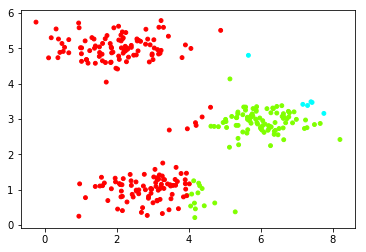

In [8]:
plotDataPoints(X,idx,K)

In [9]:
def drawLine(p1, p2):
    #DRAWLINE Draws a line from point p1 to point p2
    #   DRAWLINE(p1, p2) Draws a line from point p1 to point p2 and holds the
    #   current figure

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]])

In [10]:
def plotProgresskMeans(X, centroids, previous, idx, K, i):
    #PLOTPROGRESSKMEANS is a helper function that displays the progress of 
    #k-Means as it is running. It is intended for use only with 2D data.
    #   PLOTPROGRESSKMEANS(X, centroids, previous, idx, K, i) plots the data
    #   points with colors assigned to each centroid. With the previous
    #   centroids, it also plots a line between the previous locations and
    #   current locations of the centroids.

    # Plot the centroids as black x's
    plt.hold(True)
    plt.plot(centroids[:,0], centroids[:,1], 'x',markeredgecolor='k',markersize=10, linewidth= 3)
    # Plot the examples
    plotDataPoints(X, idx, K)


    # Plot the history of the centroids with lines
    for j in np.arange(centroids.shape[0]):
        drawLine(centroids[j, :], previous[j, :])

    # Title
    plt.title(f'Iteration {i+1}')



In [11]:
def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
    #RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
    #is a single example
    #   [centroids, idx] = RUNKMEANS(X, initial_centroids, max_iters, ...
    #   plot_progress) runs the K-Means algorithm on data matrix X, where each 
    #   row of X is a single example. It uses initial_centroids used as the
    #   initial centroids. max_iters specifies the total number of interactions 
    #   of K-Means to execute. plot_progress is a true/false flag that 
    #   indicates if the function should also plot its progress as the 
    #   learning happens. This is set to false by default. runkMeans returns 
    #   centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
    #   vector of centroid assignments (i.e. each entry in range [1..K])

    # Plot the data if we are plotting progress
    if plot_progress:
        plt.figure()

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    
    #centroids_history = np.zeros(max_iters,2)
    #centroids_history[0] = [centroids, previous_centroids]
    
    idx = np.zeros((m, 1))

    # Run K-Means
    for i in np.arange(max_iters):
        # Output progress
        #print(f'K-Means iteration {i}/{max_iters}...\n')
        # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)

        # Optionally, plot progress here
        if plot_progress:
            plt.figure()
            for j in np.arange(i+1):
                #centroids = centroids_history[0]
                #previous_centroids = centroids_history[1]
                plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
                previous_centroids = centroids
                #centroids_history[i] = [centroids, previous_centroids]

        # Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)

    # Hold off if we are plotting progress
    #if plot_progress:
    #    plt.hold(False)

    return centroids, idx


K-Means Done.



<Figure size 432x288 with 0 Axes>

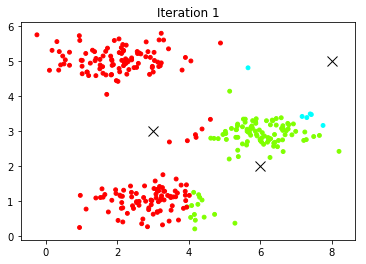

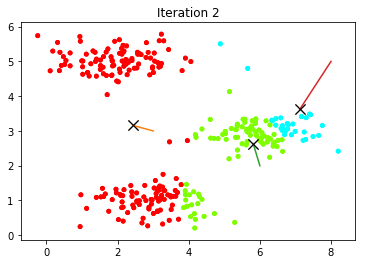

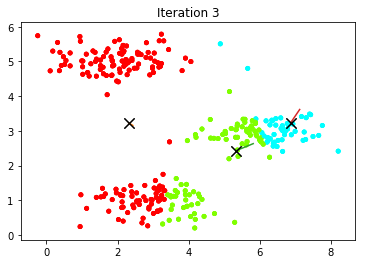

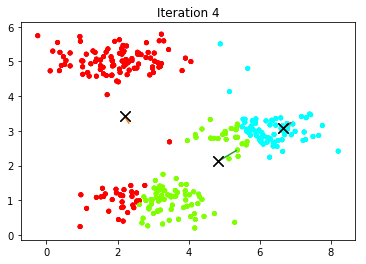

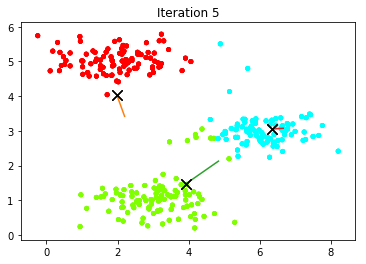

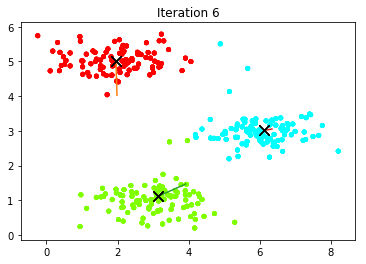

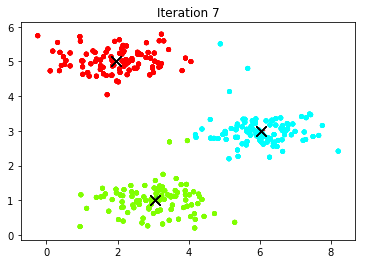

In [12]:
max_iters = 7

import warnings
warnings.filterwarnings('ignore')

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
initial_centroids = np.matrix('[3, 3; 6, 2; 8, 5]').A

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)

print('\nK-Means Done.\n')


## Part 4: K-Means Clustering on Pixels

In [28]:
# import csv data
PATH="./data/"
DATA="bird_small.mat"

import scipy.io
mat = scipy.io.loadmat(f'{PATH}{DATA}') # training data stored in arrays X, y
A255 = mat['A']
A = A255 / 255 # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
img_size = A.shape

In [29]:
def kMeansInitCentroids(X, K):
    #KMEANSINITCENTROIDS This function initializes K centroids that are to be
    #used in K-Means on the dataset X
    #   centroids = KMEANSINITCENTROIDS(X, K) returns K initial centroids to be
    #   used with the K-Means on the dataset X
    #

    # You should return this values correctly
    centroids = np.zeros((K, X.shape[1]))

    # Initialize the centroids to be random examples
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[0:K], :]
    
    return centroids

In [30]:
def compressImage (K, max_iters):

    # Reshape the image into an Nx3 matrix where N = number of pixels.
    # Each row will contain the Red, Green and Blue pixel values
    # This gives us our dataset matrix X that we will use K-Means on.

    X = A.reshape(img_size[0] * img_size[1], 3)

    # Run your K-Means algorithm on this data
    # You should try different values of K and max_iters here
    #K = 4 # tried 16, 8, 2, 3, 4
    #max_iters = 4 # tried 10, 5, 20 (4x20its looked better than 4 x 4)

    # When using K-Means, it is important the initialize the centroids
    # randomly.

    initial_centroids = kMeansInitCentroids(X, K)

    # Run K-Means
    centroids, idx = runkMeans(X, initial_centroids, max_iters)
    return X, centroids, idx


## Part 5: Image Compression

In [52]:
# create XiCollection
print('\nApplying K-Means to compress an image.\n')

K = np.array([2, 4, 16, 64])
its = np.array([2, 10])

Ai=A255
Ai = Ai.astype(int)

XiCollect = np.zeros((K.size, its.size, img_size[0],img_size[1], 3)).astype(int)
print("progress: 1%\t", end="")
for kk in np.arange(K.size):
    for ii in np.arange(its.size):
        
        k = K[kk]
        i = its[ii]
        
        X, centroids, idx = compressImage (k, i)
        
        # Find closest cluster members
        idx = findClosestCentroids(X, centroids);
        idx = idx.astype(int)

        # Essentially, now we have represented the image X as in terms of the
        # indices in idx.

        # We can now recover the image from the indices (idx) by mapping each pixel
        # (specified by its index in idx) to the centroid value
        X_recovered = centroids[idx,:]

        # Reshape the recovered image into proper dimensions
        X_recovered = X_recovered.reshape(img_size[0], img_size[1], 3)

        # Display compressed image side by side
        Xi = X_recovered*255
        Xi = Xi.astype(int)
        
        XiCollect[kk, ii]=Xi
        print(f'{(kk*its.size+ii+1)/(K.size*its.size)*100:.0f}%\t',end="", flush=True)



Applying K-Means to compress an image.

progress: 1%	12%	25%	38%	50%	62%	75%	88%	100%	

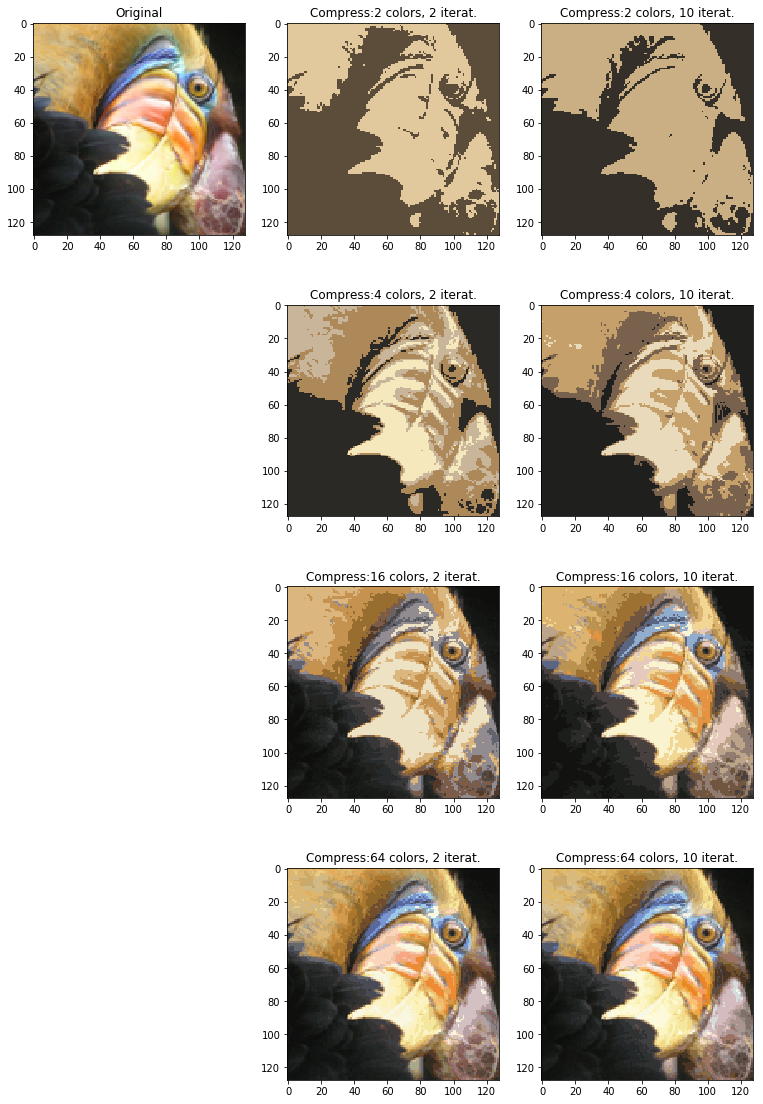

In [57]:
# do only plotting
sz=(5,5)
rows = K.size
cols = its.size+1
# Display the original image
f = plt.figure(figsize=sz)
#wspace=None, hspace=None
ax = f.add_subplot(rows, cols, 1)
ax.imshow(Ai)
ax.set_title('Original')
f.subplots_adjust(bottom=0, right=3, left=1, top=3)

for kk in np.arange(K.size):
    for ii in np.arange(its.size):
        # Display compressed image side by side
        axki = f.add_subplot(rows, cols, (kk*cols)+(ii)+2)
        k = K[kk]
        i = its[ii]
        plt.imshow(XiCollect[kk,ii])
        #print(XiCollect[kk,ii])
        plt.title(f'Compress:{k} colors, {i} iterat.')
